## Dependencies

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Importing data

In [31]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

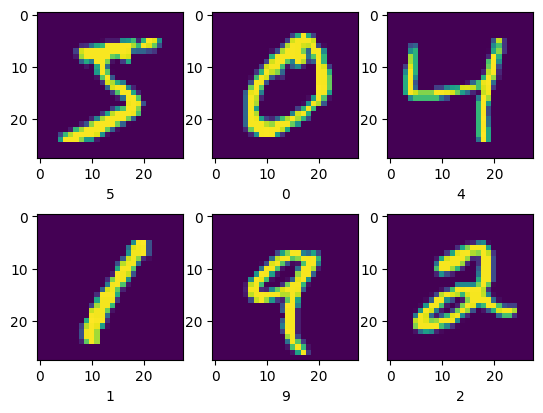

In [32]:
fig, ax = plt.subplots(2, 3)
for i in range(6):
    ax[i//3][i%3].imshow(X_train[i])
    ax[i//3][i%3].set_xlabel(y_train[i])

## Pre-processing data

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [34]:
y_train = (encoder.fit_transform(y_train.reshape(-1, 1))).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

In [37]:
X_train = X_train/255.0
X_test = X_test/255.0

## Building model

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(height_factor=0.6, width_factor=0.6, fill_mode='constant'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),filters=8, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

model.build((None, 28, 28, 1))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_zoom_3 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 8)           1608      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)          0         
 2D)                                                             
                                                                 
 global_max_pooling2d_2 (Glo  (None, 8)               

## Training

In [41]:
checkpoint_path = 'models/cp.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.fit(X_train, y_train, epochs=100, callbacks=cp_callback)

## Evaluating

In [44]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [45]:
y_test = encoder.inverse_transform(y_test)
y_pred = np.argmax(y_pred, axis=1)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
acc

0.9372

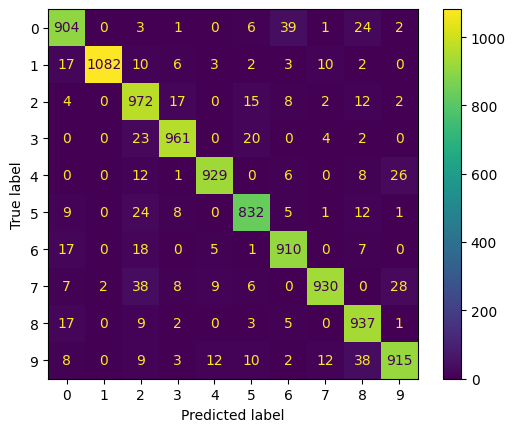

In [50]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()